In [3]:
import numpy as np
import sklearn
import os
import glob
from PIL import Image
import pickle
import matplotlib.pyplot as plt

DATA_DIR = '/projectnb2/dl523/projects/trace_22/data/processed'

In [6]:
expressions = []
tokens_list = []
images = []
traces = []
names = []

missing = []

for i, entry in enumerate(glob.iglob(DATA_DIR+"/*.txt")):
    if (i+1) % 200 == 0:
        print(i)
    
    name = os.path.splitext(
        os.path.basename(entry)
    )[0]
    
    if os.path.exists(
        os.path.join(DATA_DIR, name+'.png')
    ) and os.path.exists(
        os.path.join(DATA_DIR, name+'.pkl')
    ) and os.path.exists(
        os.path.join(DATA_DIR, name+'.token')):
        
        names.append(name)
    
        with open(entry, 'r') as f:
            latex = f.read()
            expressions.append(latex)      

        with Image.open(
            os.path.join(DATA_DIR, name+'.png'), 'r'
        ) as im:
            im = np.asarray(im)
            images.append(im)
        
        with open(
            os.path.join(DATA_DIR, name+'.pkl'), 'rb'
        ) as f:
            trace = pickle.load(f)
            traces.append(trace)
            
        with open(
            os.path.join(DATA_DIR, name+'.token'), 'r'
        ) as f:
            tokens = f.read()
            tokens_list.append(tokens)
        
    else:
        missing.append(name)
    
print(len(expressions))
print(len(missing))

199
399
599
799
999
1199
1399
1599
1799
1999
2199
2399
2599
2799
2999
3199
3399
3599
3799
3999
4199
4399
4599
4799
4999
5199
5399
5599
5799
5999
6199
6399
6599
6799
6999
7199
7399
7599
7799
7999
8199
8399
8599
8799
8999
9199
9399
9599
9799
9999
10199
10399
10599
10799
10999
11199
11399
11599
11799
11999
12199
12399
10948
1590


In [7]:
print(len(expressions))
print(len(tokens_list))
print(len(images))
print(len(traces))
print(len(missing))

10948
10948
10948
10948
1590


### Dataset config:

* Pickle file : trace22/data/cleaned/dataset.pkl
* format:
    `[traces, images, tokens, expressions]`
* samples: 


In [ ]:
CLEANED_DIR = '/projectnb2/dl523/projects/trace_22/data/cleaned'
DATASET_PICKLE = [traces, images, tokens_list, expressions]
path = os.path.join(CLEANED_DIR, 'dataset2.pkl')
with open(path, 'wb') as f:
    pickle.dump(DATASET_PICKLE, f)
          
print('Saved pickled dataset at ', path)

In [11]:
ndims = []
X, Y = [], []
for im in images:
    ndims.append(im.ndim)
    x, y = im.shape[:2]
    X.append(x)
    Y.append(y)
    

print('N dims:')
print(np.unique(ndims, return_counts=True))
    
print('X, Y')
print('min')
print((np.min(X)), np.min(Y))

print('max')
print((np.max(X)), np.max(Y))

print('mean')
print((np.mean(X)), np.mean(Y))



N dims:
(array([3]), array([10948]))
X, Y
min
20 20
max
389 515
mean
205.20451223967848 493.4176105224699


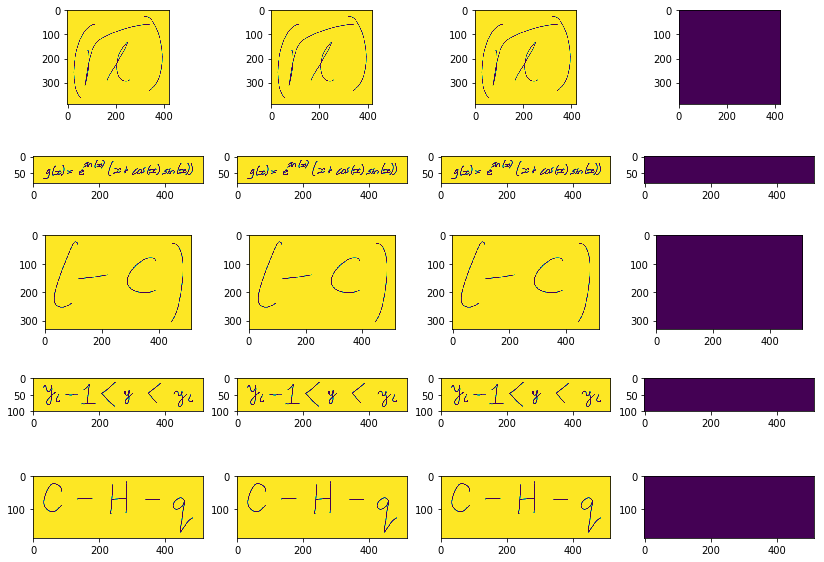

In [17]:
fig, ax = plt.subplots(5, 4, figsize=(14,10))
for n in range(5):
    im = images[n*54]
    for i in range(4):
        ax[n,i].imshow(im[:,:,i])

### 3 of the channels are redundant, we only need a 2d image in grayscale

In [18]:
im = images[0][:,:,0]
im.shape

(389, 420)

In [8]:
for i, img in enumerate(images):
    images[i] = img[:,:,0]

In [9]:
images[1].shape

(99, 515)

In [10]:
CLEANED_DIR = '/projectnb2/dl523/projects/trace_22/data/cleaned'
DATASET_PICKLE = [traces, images, tokens_list, expressions]
path = os.path.join(CLEANED_DIR, 'dataset2.pkl')
with open(path, 'wb') as f:
    pickle.dump(DATASET_PICKLE, f)
          
print('Saved pickled dataset at ', path)

Saved pickled dataset at  /projectnb2/dl523/projects/trace_22/data/cleaned/dataset2.pkl


### How to load dataset:

In [4]:
CLEANED_DIR = '/projectnb2/dl523/projects/trace_22/data/cleaned'
# DATASET_PICKLE = [traces, images, tokens, expressions]
path = os.path.join(CLEANED_DIR, 'dataset.pkl')

with open(path, 'rb') as f:
    dataset = pickle.load(f)
          
print((len(dataset), len(dataset[0])))

(4, 10948)
